In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.knn import knn
from src.utils import *
sns.set()

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df, dd, ddi = knn("creditcard",
                  n_neighbors_values=range(1,15,1),
                  p_values=range(1,6),
                  training_sizes=range(10000, 100001, 10000))

Selected data set is creditcard with 100236 data (train: 100000 , test: 236 )


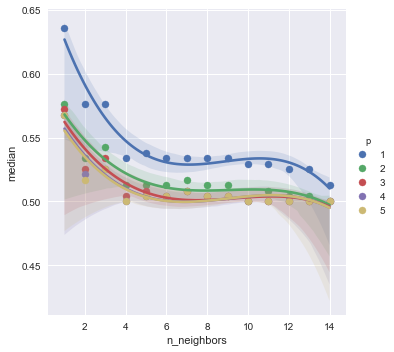

In [3]:
cd = consolidate_dict_data(dd, consolidate_argx=ddi['n_neighbors'], argx_name='n_neighbors',
                           consolidate_argy=ddi['score_type'], argy_name='score',
                           consolidate_argz=ddi['p'],
                           filters=[(ddi['train_limit'], 90000)])
sdf = to_seaborn_dataframe(cd, wanted_value='median', 
                           value_name='median', 
                           consolidate_z_name='p')
sns.lmplot(x='n_neighbors', y='median', hue='p', data=sdf, x_estimator=np.median, order=3, truncate=True)

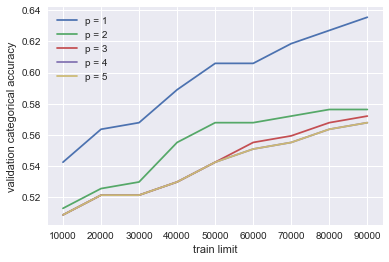

In [11]:
cd = consolidate_dict_data(dd, consolidate_argx=ddi['train_limit'], argx_name='train_limit',
                           consolidate_argy=ddi['score_type'], argy_name='score',
                           consolidate_argz=ddi['p'],
                           filters=[(ddi['n_neighbors'], 1)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('train_limit'),d.get('median'), label='p = '+str(a))
    plt.fill_between(d.get('train_limit'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.5)
plt.ylabel('validation categorical accuracy')
plt.xlabel('train limit')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/knn_creditcard_train_limit.png")
plt.show()

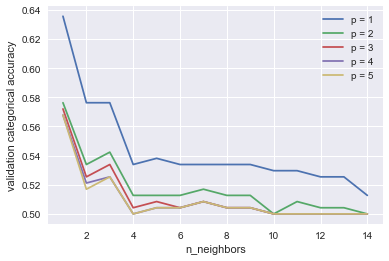

In [12]:
cd = consolidate_dict_data(dd, consolidate_argx=ddi['n_neighbors'], argx_name='n_neighbors',
                           consolidate_argy=ddi['score_type'], argy_name='score',
                           consolidate_argz=ddi['p'],
                           filters=[(ddi['train_limit'], 90000)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('n_neighbors'),d.get('median'), label='p = ' + str(a))
    plt.fill_between(d.get('n_neighbors'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('n_neighbors')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of neighbors\nused for the classification")
plt.savefig("graphs/knn_creditcard_neighbors.png")
plt.show()

In [ ]:
print(ddi)
print(cd)

In [7]:
dfs, dds, ddis = knn("starcraft",
                  n_neighbors_values=range(1,15,1),
                  p_values=range(1,6),
                  training_sizes=range(500, 2001, 500))

Selected data set is starcraft with 2834 data (train: 1950 , test: 884 )


/home/nicolas/Documents/Programation/Python/ML_HW_supervisedlearning/src/utils.py:84: RuntimeWarning: invalid value encountered in true_divide
  x_train[:] = x_train[:] - x_min / (x_max - x_min)
/home/nicolas/Documents/Programation/Python/ML_HW_supervisedlearning/src/utils.py:85: RuntimeWarning: invalid value encountered in true_divide
  x_test[:] = x_test[:] - x_min / (x_max - x_min)


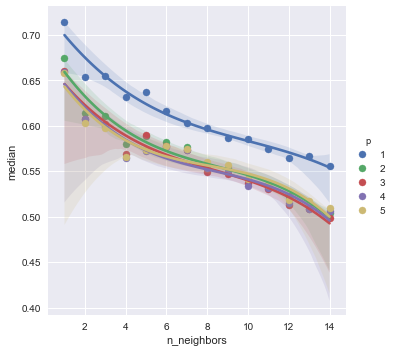

In [8]:
cd = consolidate_dict_data(dds, consolidate_argx=ddis['n_neighbors'], argx_name='n_neighbors',
                           consolidate_argy=ddis['score_type'], argy_name='score',
                           consolidate_argz=ddis['p'],
                           filters=[(ddis['train_limit'], 2000)])
sdf = to_seaborn_dataframe(cd, wanted_value='median', 
                           value_name='median', 
                           consolidate_z_name='p')
sns.lmplot(x='n_neighbors', y='median', hue='p', data=sdf, x_estimator=np.median, order=3, truncate=True)

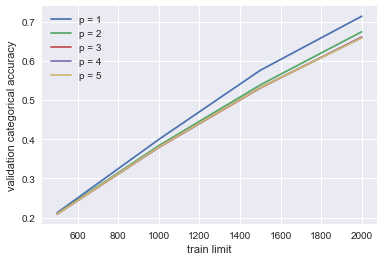

In [13]:
cd = consolidate_dict_data(dds, consolidate_argx=ddis['train_limit'], argx_name='train_limit',
                           consolidate_argy=ddis['score_type'], argy_name='score',
                           consolidate_argz=ddis['p'],
                           filters=[(ddis['n_neighbors'], 1)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('train_limit'),d.get('median'), label='p = ' + str(a))
    plt.fill_between(d.get('train_limit'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('train limit')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/knn_starcraft_train_limit.png")
plt.show()

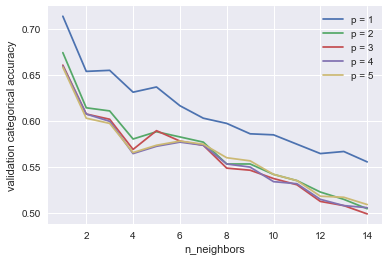

In [14]:
cd = consolidate_dict_data(dds, consolidate_argx=ddis['n_neighbors'], argx_name='n_neighbors',
                           consolidate_argy=ddis['score_type'], argy_name='score',
                           consolidate_argz=ddis['p'],
                           filters=[(ddis['train_limit'], 2000)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get('n_neighbors'),d.get('median'), label='p = ' + str(a))
    plt.fill_between(d.get('n_neighbors'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('n_neighbors')
plt.legend()
#plt.title("Evolution of acuracy acording to the number of neighbors\nused for the classification")
plt.savefig("graphs/knn_starcraft_neighbors.png")
plt.show()